In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\Salary\cleaned_salaries.csv")

In [3]:
df

,role,country,company,company_rating,job_title,median,low,high,unit
0,Data Scientist,Japan,CTW,2.9,Data Scientist,1500000,1,18.0,per year
1,Data Scientist,Japan,FUJIFILM,3.7,Data Scientist,5000000,5,7.0,per year
2,Data Scientist,Japan,GMO Internet,3.3,Data Scientist,6500000,7,48.0,per year
3,Data Scientist,Japan,Data4Cʼs,3.0,Data Scientist,350000,300,402.0,per month
4,Data Scientist,Japan,Deloitte,4.0,Data Scientist,6250000,5,8.0,per year
...,...,...,...,...,...,...,...,...,...
401177,Data Engineer,Romania,FinProm,2.9,Data Entry Operator,3716,4,4.0,per month
401178,Data Engineer,Romania,GRS,3.0,Data Entry Operator,1612,2,2.0,per month
401179,Data Engineer,Romania,Woods Valldata,2.6,Data Entry Operator,1648,2,2.0,per year
401180,Data Engineer,Romania,FM Logistic,3.5,Data Entry Operator,4908,5,5.0,per month


# 1. Salary Distribution Analysis

In [4]:
# Summary Statistics
# Summary statistics for median, low, and high salary columns
salary_stats = df[['median', 'low', 'high']].describe()
print(salary_stats)


             median            low           high
count  4.011820e+05  401182.000000  401182.000000
mean   1.665275e+06      78.188411      78.269895
std    6.929252e+07     248.141687     120.810681
min    1.000000e+00       0.000000       1.000000
25%    8.300250e+03      14.000000      15.000000
50%    4.500000e+04      43.000000      48.000000
75%    9.061100e+04      80.000000      95.000000
max    1.595598e+10   50000.000000     999.000000


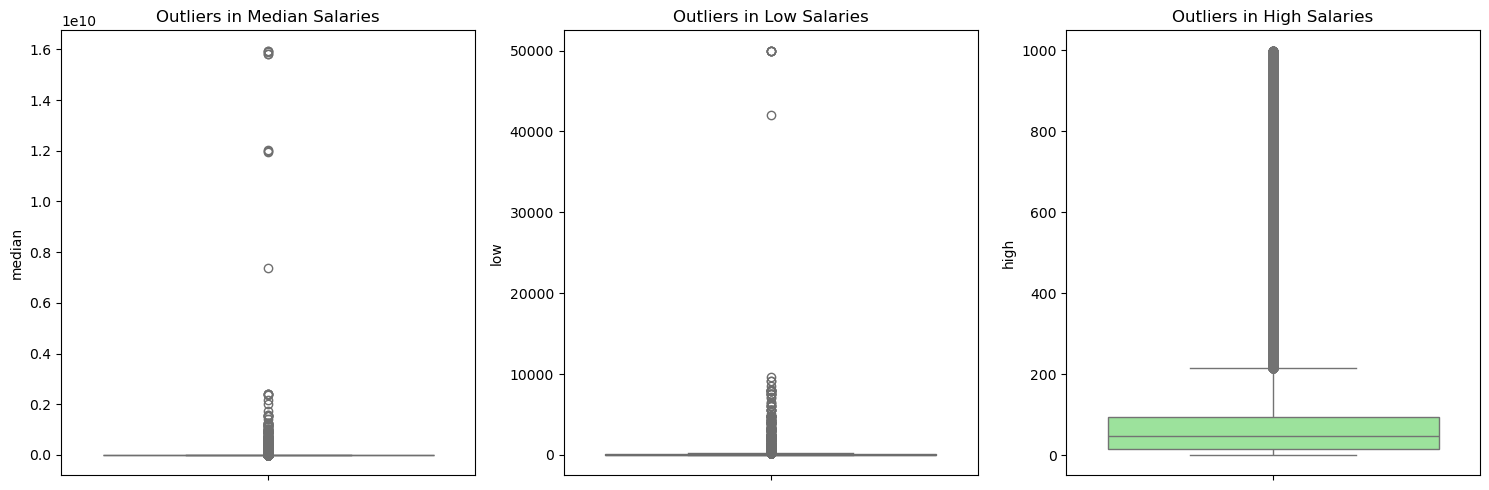

In [5]:
# Box plots for detecting outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['median'], ax=ax[0], color="skyblue")
ax[0].set_title('Outliers in Median Salaries')

sns.boxplot(y=df['low'], ax=ax[1], color="salmon")
ax[1].set_title('Outliers in Low Salaries')

sns.boxplot(y=df['high'], ax=ax[2], color="lightgreen")
ax[2].set_title('Outliers in High Salaries')

plt.tight_layout()
plt.show()


In [6]:
# Filter data for exceptionally high and low salaries in each category
high_outliers = df[df['high'] > (df['high'].quantile(0.75) + 1.5 * (df['high'].quantile(0.75) - df['high'].quantile(0.25)))]
low_outliers = df[df['low'] < (df['low'].quantile(0.25) - 1.5 * (df['low'].quantile(0.75) - df['low'].quantile(0.25)))]

# Display high salary outliers
print("High Salary Outliers:")
print(high_outliers[['role', 'country', 'company', 'median', 'low', 'high']])

# Display low salary outliers
print("Low Salary Outliers:")
print(low_outliers[['role', 'country', 'company', 'median', 'low', 'high']])

High Salary Outliers:
                  role  country                         company  median  low  \
3       Data Scientist    Japan                        Data4Cʼs  350000  300   
18      Data Scientist    Japan                             AIG  853333  767   
19      Data Scientist    Japan                       Nextremer  448841  429   
21      Data Scientist    Japan   Japan Data Science Consortium  398624  383   
23      Data Scientist    Japan                           Atrae  297854  287   
...                ...      ...                             ...     ...  ...   
401064   Data Engineer  Romania                          UiPath  240161  232   
401083   Data Engineer  Romania                  Crystal System  347960  334   
401098   Data Engineer  Romania                             IBM     596  570   
401121   Data Engineer  Romania  Parexel International Services  361093  348   
401152   Data Engineer  Romania                       Alfa Vega     903  868   

         high  
3

In [7]:
low_outliers

,role,country,company,company_rating,job_title,median,low,high,unit


In [8]:
high_outliers

,role,country,company,company_rating,job_title,median,low,high,unit
3,Data Scientist,Japan,Data4Cʼs,3.0,Data Scientist,350000,300,402.0,per month
18,Data Scientist,Japan,AIG,3.7,Data Scientist,853333,767,940.0,per month
19,Data Scientist,Japan,Nextremer,3.2,Data Scientist,448841,429,469.0,per month
21,Data Scientist,Japan,Japan Data Science Consortium,2.4,Data Scientist,398624,383,414.0,per month
23,Data Scientist,Japan,Atrae,5.0,Data Scientist,297854,287,309.0,per month
...,...,...,...,...,...,...,...,...,...
401064,Data Engineer,Romania,UiPath,4.1,Senior Data Analyst,240161,232,248.0,per year
401083,Data Engineer,Romania,Crystal System,3.6,Lead Data Engineer,347960,334,361.0,per year
401098,Data Engineer,Romania,IBM,4.0,Business Data Analyst,596,570,622.0,per month
401121,Data Engineer,Romania,Parexel International Services,3.8,Clinical Data Manager,361093,348,374.0,per year
